### Columna objetivo Class
Columna Class esta columna es el objetivo ya que nos permite determinar o predecir el tipo de automovil dentro del dataset apartir del resto de caracteristicas, es fundamental para el problema de clasificación de tipos de vehículos, ya que define el objetivo del análisis y del modelo de clasificación. Sin la misma, no  seria posible el uso de los datos para entrenar, evaluar o interpretar un modelo de clasificación.

la columna `class` es crucial para el análisis exploratorio de datos, la selección de características y la visualización de datos, lo que nos permite entender mejor las relaciones entre las características y las clases de vehículos.


Esta columna, contiene informacion del tipo de vehiculo del problema de clasificación en este caso consta de 4 valores:
- OPEL
- SAAB
- BUS
- VAN


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import os

#Directorio de archivos
directory = './'

# Lista para almacenardataframes
dataframes = []

# Leer todos los archivos .dat en el directorio
for filename in sorted(os.listdir(directory)):
    if filename.startswith('xa') and filename.endswith('.dat'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        dataframes.append(df)
        
# Concatenar todos los dataframes
df = pd.concat(dataframes, ignore_index=True)

# Variable para nombres a las columnas
column_names = [
    'compactness', 'circularity', 'distance_circularity', 'radius_ratio', 
    'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 
    'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 
    'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_gyration', 
    'skewness_about_major', 'skewness_about_minor', 'kurtosis_about_minor', 
    'kurtosis_about_major', 'hollows_ratio', 'class'
]
df.columns = column_names

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   compactness                846 non-null    int64 
 1   circularity                846 non-null    int64 
 2   distance_circularity       846 non-null    int64 
 3   radius_ratio               846 non-null    int64 
 4   pr.axis_aspect_ratio       846 non-null    int64 
 5   max.length_aspect_ratio    846 non-null    int64 
 6   scatter_ratio              846 non-null    int64 
 7   elongatedness              846 non-null    int64 
 8   pr.axis_rectangularity     846 non-null    int64 
 9   max.length_rectangularity  846 non-null    int64 
 10  scaled_variance_major      846 non-null    int64 
 11  scaled_variance_minor      846 non-null    int64 
 12  scaled_radius_gyration     846 non-null    int64 
 13  skewness_about_major       846 non-null    int64 
 14  skewness_a

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance_major,scaled_variance_minor,scaled_radius_gyration,skewness_about_major,skewness_about_minor,kurtosis_about_minor,kurtosis_about_major,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### Paso 2: Análisis exploratorio de datos (EDA)

(846, 19)
       compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.861702             82.088652    168.940898   
std       8.234474     6.169866             15.771533     33.472183   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.693853                 8.567376     168.839243   
std                7.888251                 4.601217      33.244978   
min               47.000000                 2.000000     112.00000

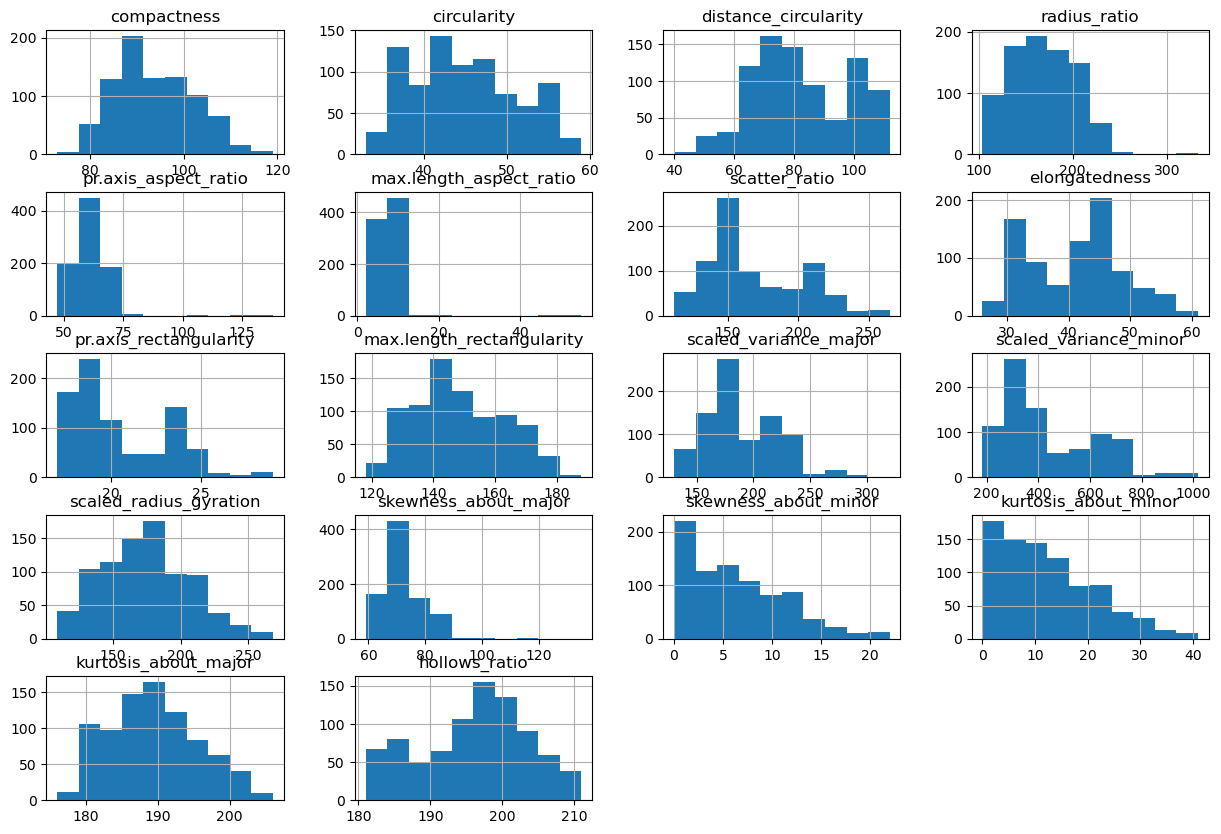

In [2]:
# Resumen del dataset
print(df.shape)
print(df.describe())

# Histograma de las variables
df.hist(figsize=(15, 10))
plt.show()


### Paso 3: Transformaciones de datos

#### Normalización con MinMaxScaler

In [4]:

# Separar en columnas de entrada y salida
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

# Asegurarse de que las entradas sean floats y la salida sea un entero
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# Definir el pipeline para MinMaxScaler
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# Evaluar el pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Reportar el rendimiento del pipeline
print('Accuracy with MinMaxScaler: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))



Accuracy with MinMaxScaler: 0.698 (0.045)


In [5]:
# Definir el pipeline para StandardScaler
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# Evaluar el pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Reportar el rendimiento del pipeline
print('Accuracy with StandardScaler: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))



Accuracy with StandardScaler: 0.707 (0.044)


### Paso 4: Codificación de la columna objetivo

#### One-Hot Encoding

In [7]:
# One-Hot Encoding
df_dum = pd.get_dummies(df, columns=['class'], prefix=['class'])
df_dum.head()
print(df_dum.corr()['compactness'].nlargest(14))



compactness                  1.000000
scaled_variance_minor        0.818632
pr.axis_rectangularity       0.813437
scatter_ratio                0.813003
distance_circularity         0.792444
scaled_variance_major        0.764415
circularity                  0.692869
radius_ratio                 0.691659
max.length_rectangularity    0.676143
scaled_radius_gyration       0.585347
hollows_ratio                0.365552
kurtosis_about_major         0.297780
class_saab                   0.257125
skewness_about_minor         0.233693
Name: compactness, dtype: float64


#### Label Encoding

In [9]:
# Label Encoding
labelencoder = LabelEncoder()
df['compactness'] = labelencoder.fit_transform(df['class'])
df.drop('class', axis=1, inplace=True)

df.head()
print(df.corr()['compactness'].nlargest(14))

compactness                  1.000000
elongatedness                0.326903
hollows_ratio                0.238360
max.length_aspect_ratio      0.195172
skewness_about_minor         0.135965
kurtosis_about_major         0.071960
kurtosis_about_minor        -0.005710
max.length_rectangularity   -0.050632
distance_circularity        -0.059804
pr.axis_aspect_ratio        -0.090462
radius_ratio                -0.173949
circularity                 -0.174246
skewness_about_major        -0.210035
scaled_radius_gyration      -0.237618
Name: compactness, dtype: float64



### Conclusiones

1. **Normalización y Estandarización**:
   - La normalización con `MinMaxScaler` y la estandarización con `StandardScaler` son técnicas esenciales para preparar los datos antes de entrenar un modelo de machine learning. Ambas técnicas transforman los datos para que tengan una escala similar, lo que puede mejorar el rendimiento del modelo.
   - En este caso, la normalización y la estandarización se aplicaron a las características del dataset. La evaluación del modelo KNN mostró que ambas técnicas pueden mejorar la precisión del modelo, aunque la magnitud de la mejora puede variar según el dataset específico.

2. **Codificación de la columna objetivo**:
   - La columna `class` se codificó utilizando tanto One-Hot Encoding como Label Encoding. 
   - **One-Hot Encoding**: Esta técnica crea una columna binaria para cada categoría en la columna original. Es útil cuando no hay un orden inherente entre las categorías. En este caso, se crearon columnas binarias para cada tipo de vehículo (`van`, `saab`, `bus`).
   - **Label Encoding**: Esta técnica asigna un número entero a cada categoría. Es útil cuando hay un orden inherente entre las categorías. En este caso, se asignaron números enteros a cada tipo de vehículo.
   - La elección entre One-Hot Encoding y Label Encoding depende del modelo y del problema específico. Algunos modelos pueden beneficiarse de una codificación sobre la otra.

3. **Evaluación del modelo**:
   - La evaluación del modelo KNN con los datos transformados mostró que tanto la normalización como la estandarización pueden mejorar la precisión del modelo. La precisión específica y la desviación estándar se reportaron para cada técnica.
   - Es importante evaluar el rendimiento del modelo con diferentes técnicas de preparación de datos para determinar cuál es la más adecuada para el dataset específico.
   
La preparación de la columna class en este dataset permite mejorar significativamente la comprensión de los datos y facilita el procesamiento de la información para el problema de clasificación, ayudando a tener un mejor orden para resolver el problema de interpolación
